In [1]:
import pandas as pd
import numpy as np

from pycaret.classification import *

from sklearn.metrics import log_loss, f1_score

In [2]:
base_train = catalog.load("base_train")
base_train

[04/13/23 23:26:56] INFO     Loading data from 'base_train' (ParquetDataSet)...                 ]8;id=413107;file://C:\Users\vinli\Documents\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=84057;file://C:\Users\vinli\Documents\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
2044,34.0443,-118.2698,4,3,0,0,1.0
19713,34.0443,-118.2848,8,3,0,1,0.0
3691,34.0443,-118.1398,4,4,0,13,0.0
24136,34.0443,-118.2698,9,4,0,0,1.0
1163,34.0103,-118.2688,2,3,0,3,0.0
...,...,...,...,...,...,...,...
13528,34.0443,-118.2698,10,3,0,0,0.0
7592,33.9123,-118.2438,1,1,0,13,0.0
196,33.9513,-118.2688,11,2,0,9,0.0
19353,34.0193,-118.2688,5,1,0,2,1.0


In [3]:
base_test = catalog.load("base_test")
base_test

[04/13/23 23:26:58] INFO     Loading data from 'base_test' (ParquetDataSet)...                  ]8;id=668376;file://C:\Users\vinli\Documents\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=689839;file://C:\Users\vinli\Documents\.venv\venv_black_mamba_pd\lib\site-packages\kedro\io\data_catalog.py#343\343]8;;\

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag
17480,34.0503,-118.4488,3,3,0,17,0.0
1533,34.0443,-118.2698,3,4,0,0,1.0
3719,34.0443,-118.2698,8,4,0,0,1.0
11395,34.0443,-118.2698,8,1,0,0,0.0
4109,33.9013,-118.3718,7,3,0,17,0.0
...,...,...,...,...,...,...,...
19467,33.9173,-118.2698,5,1,0,12,0.0
9886,33.9813,-118.2288,7,2,0,7,0.0
27859,33.9903,-118.2778,11,1,1,5,1.0
18594,34.0373,-118.1038,2,1,0,16,1.0


## Treinamento_RegLog

In [4]:
setup_de_classificacao = setup(data = base_train, target='shot_made_flag', session_id = 17042023)

,Description,Value
0,Session id,17042023
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [5]:
lr_model = setup_de_classificacao.create_model('lr' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5871,0.5842,0.4908,0.5795,0.5315,0.1670,0.1688
1,0.5766,0.6003,0.4686,0.5682,0.5137,0.1448,0.1469
2,0.5836,0.5919,0.4520,0.5819,0.5088,0.1573,0.1611
3,0.5616,0.5945,0.4686,0.5474,0.5050,0.1158,0.1170
4,0.6012,0.6098,0.4539,0.6104,0.5206,0.1917,0.1979
5,0.5625,0.5887,0.5018,0.5451,0.5226,0.1201,0.1205
6,0.5669,0.5849,0.4963,0.5512,0.5223,0.1282,0.1288
7,0.5880,0.6023,0.5009,0.5800,0.5375,0.1697,0.1712
8,0.5845,0.5873,0.5064,0.5741,0.5382,0.1632,0.1643


In [6]:
type(lr_model)

sklearn.linear_model._logistic.LogisticRegression

In [7]:
lr_model_results = setup_de_classificacao.pull()
lr_model_results

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5871,0.5842,0.4908,0.5795,0.5315,0.1670,0.1688
1,0.5766,0.6003,0.4686,0.5682,0.5137,0.1448,0.1469
2,0.5836,0.5919,0.4520,0.5819,0.5088,0.1573,0.1611
3,0.5616,0.5945,0.4686,0.5474,0.5050,0.1158,0.1170
4,0.6012,0.6098,0.4539,0.6104,0.5206,0.1917,0.1979
5,0.5625,0.5887,0.5018,0.5451,0.5226,0.1201,0.1205
6,0.5669,0.5849,0.4963,0.5512,0.5223,0.1282,0.1288
7,0.5880,0.6023,0.5009,0.5800,0.5375,0.1697,0.1712
8,0.5845,0.5873,0.5064,0.5741,0.5382,0.1632,0.1643


In [8]:
pred_lr = predict_model(lr_model, base_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.5765,0.5956,0.4734,0.5678,0.5163,0.1452,0.1471


In [9]:
f1 = f1_score(pred_lr[['shot_made_flag']], pred_lr[['prediction_label']])
f1

0.5163288288288289

In [11]:
pred2 = lr_model.predict_proba(base_test[['lat', 'lon', 'minutes_remaining', 'period', 'playoffs','shot_distance']])
pred3 = pd.DataFrame(pred2)
pred3

,0,1
0,0.604760,0.395240
1,0.423472,0.576528
2,0.410938,0.589062
3,0.397349,0.602651
4,0.594880,0.405120
...,...,...
4052,0.536430,0.463570
4053,0.480718,0.519282
4054,0.443689,0.556311
4055,0.587793,0.412207


In [12]:
lg = log_loss(pred_lr[['shot_made_flag']], pred3)
lg

0.6779142416396803

## Treinamento_Clf

In [13]:
setup_de_classificacao = setup(data = base_train, target='shot_made_flag', session_id = 17042023 )

,Description,Value
0,Session id,17042023
1,Target,shot_made_flag
2,Target type,Binary
3,Original data shape,"(16228, 7)"
4,Transformed data shape,"(16228, 7)"
5,Transformed train set shape,"(11359, 7)"
6,Transformed test set shape,"(4869, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [14]:
melhores_modelos = compare_models(n_select=5, sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.5752,0.5971,0.5269,0.5587,0.5421,0.1466,0.1470,0.5800
dt,Decision Tree Classifier,0.5358,0.5172,0.5681,0.5124,0.5387,0.0740,0.0745,0.5100
rf,Random Forest Classifier,0.5608,0.5734,0.5245,0.5414,0.5327,0.1186,0.1187,0.6920
et,Extra Trees Classifier,0.5549,0.5630,0.5256,0.5346,0.5299,0.1073,0.1074,0.7490
nb,Naive Bayes,0.5766,0.5916,0.4965,0.5650,0.5282,0.1471,0.1484,0.4950
lda,Linear Discriminant Analysis,0.5789,0.5955,0.4910,0.5688,0.5266,0.1511,0.1527,0.4990
ridge,Ridge Classifier,0.5784,0.0000,0.4895,0.5683,0.5256,0.1500,0.1516,0.5030
lr,Logistic Regression,0.5789,0.5920,0.4817,0.5706,0.5219,0.1504,0.1525,0.4210
knn,K Neighbors Classifier,0.5374,0.5504,0.5100,0.5158,0.5128,0.0724,0.0725,0.5410
lightgbm,Light Gradient Boosting Machine,0.5677,0.5856,0.4744,0.5554,0.5115,0.1282,0.1295,0.4930


In [15]:
melhores_modelos

[QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                               store_covariance=False, tol=0.0001),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        random_state=17042023, splitter='best'),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=100, n_jobs=-1, oob_score=False,
                        random_state=17042023, verbose=0, warm_start=False

In [16]:
qda_clf_model = melhores_modelos[0]
qda_clf_model

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
                              store_covariance=False, tol=0.0001)

In [17]:
type(qda_clf_model)

sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis

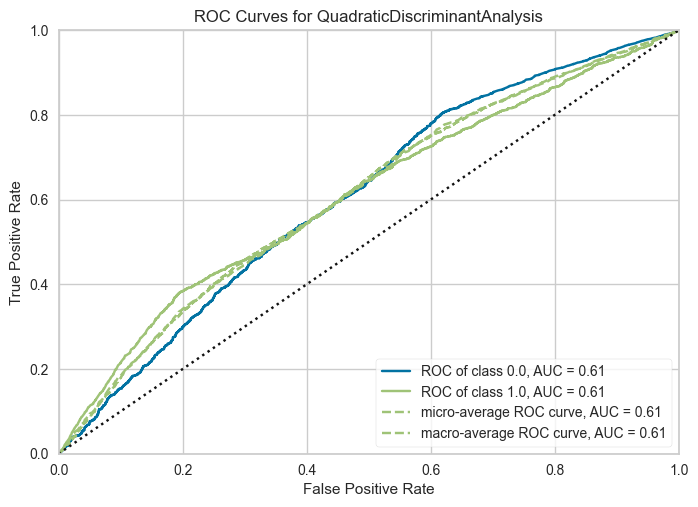

In [18]:
plot_model(qda_clf_model)

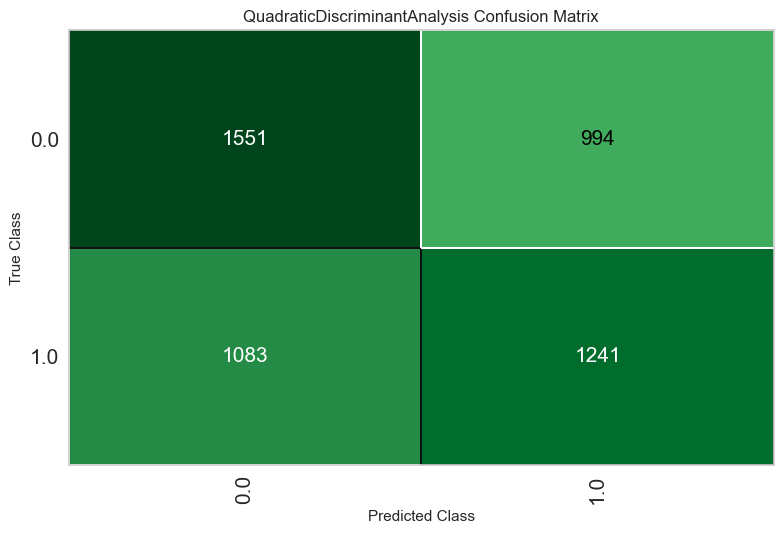

In [19]:
plot_model(qda_clf_model, plot='confusion_matrix')

In [20]:
pred_qda_clf = predict_model(qda_clf_model, base_test)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Quadratic Discriminant Analysis,0.5743,0.5928,0.5266,0.5574,0.5415,0.1449,0.1451


In [21]:
pred_qda_clf

,lat,lon,minutes_remaining,period,playoffs,shot_distance,shot_made_flag,prediction_label,prediction_score
17480,34.050301,-118.448799,3,3,0,17,0.0,0,0.9114
1533,34.044300,-118.269798,3,4,0,0,1.0,1,0.6655
3719,34.044300,-118.269798,8,4,0,0,1.0,1,0.6656
11395,34.044300,-118.269798,8,1,0,0,0.0,1,0.6991
4109,33.901299,-118.371803,7,3,0,17,0.0,0,0.5899
...,...,...,...,...,...,...,...,...,...
19467,33.917301,-118.269798,5,1,0,12,0.0,0,0.5140
9886,33.981300,-118.228798,7,2,0,7,0.0,1,0.5755
27859,33.990299,-118.277802,11,1,1,5,1.0,1,0.6288
18594,34.037300,-118.103798,2,1,0,16,1.0,0,0.7522


In [22]:
f1 = f1_score(pred_qda_clf[['shot_made_flag']], pred_qda_clf[['prediction_label']])
f1

0.5415449960180514

In [23]:
pred2 = qda_clf_model.predict_proba(base_test[['lat', 'lon', 'minutes_remaining', 'period', 'playoffs','shot_distance']])
pred3 = pd.DataFrame(pred2)
pred3

,0,1
0,0.911429,0.088571
1,0.334513,0.665487
2,0.334384,0.665616
3,0.300921,0.699079
4,0.589930,0.410070
...,...,...
4052,0.514017,0.485983
4053,0.424472,0.575528
4054,0.371195,0.628805
4055,0.752224,0.247776


In [24]:
lg = log_loss(pred_lr[['shot_made_flag']], pred3)
lg

0.7031851627461273